In [12]:
import sys
sys.path.insert(1, '/home/amrzr/Work/Codes/Offline_IMOEA_Framework/')
import main_project_files.plotting_tools.plot3d_confidence_v2 as plt_int3
import pandas as pd
import numpy as np
from plotly.offline.offline import plot
import plotly_express as ex
import pickle
import csv
from other_tools.non_domx import ndx
from pygmo import hypervolume as hv
from scipy.spatial import distance
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font',**{'family':'serif','serif':['Helvetica']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 15})
font_size=17
color_code = 'blue'

In [13]:
data_folder = '/home/amrzr/Work/Codes/data/test_runs/'
main_directory = 'Offline_Pump_simulations_results'  # 487 samples

main_directory2 = 'Pump_test_04_DOE_probclass_v2_run2'  # 487 samples


data_folder1 = data_folder + main_directory
data_folder2 = data_folder + main_directory2


data_file = data_folder1+'/DOE4v2_dv_surr_cfd.csv'

data_file_decisions = data_folder1+'/decision_solutions.csv'
data_file_run_objs = data_folder2+'/OBJ.csv'
data_file_run_unc = data_folder2+'/UNC.csv'


df = pd.read_csv(data_file)
df_decisions = pd.read_csv(data_file_decisions)
df_run_objs = pd.read_csv(data_file_run_objs)
df_run_unc = pd.read_csv(data_file_run_unc)

y_data_surrogate_success = -df.values[:,23:26]
y_data_success = -df.values[:,26:30]

y_data_surrogate_decisions = -df_decisions.values[:,23:26]
y_data_success_decisions = -df_decisions.values[:,26:30]

data_surrogate_rows = df_run_objs.shape[0]-1

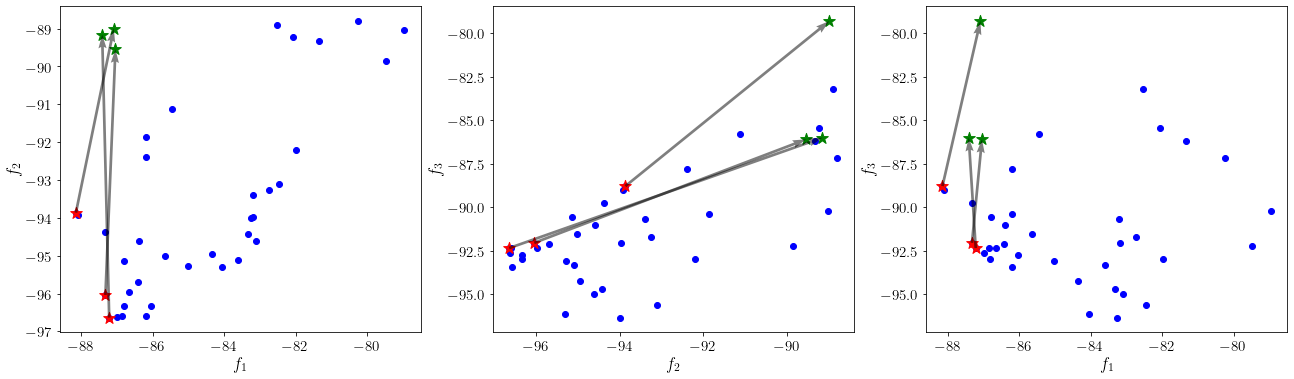

In [37]:
fig = plt.figure()
fig.set_size_inches(22, 6)

ax = fig.add_subplot(131)
ax.scatter(y_data_surrogate_success[:,0],y_data_surrogate_success[:,1], c='blue')
ax.scatter(y_data_surrogate_decisions[:,0],y_data_surrogate_decisions[:,1], c='red', marker='*',s=150)
ax.scatter(y_data_success_decisions[:,0],y_data_success_decisions[:,1], c='green', marker='*',s=150)
ax.quiver(y_data_surrogate_decisions[:,0],
        y_data_surrogate_decisions[:,1],
        (y_data_success_decisions[:,0]-y_data_surrogate_decisions[:,0]),
        (y_data_success_decisions[:,1]-y_data_surrogate_decisions[:,1]),
        angles='xy', scale_units='xy', scale=1, alpha=0.5)
#ax.set_title('f1 vs f2')
ax.set_xlabel(r'$f_1$', fontsize=font_size)
#ax.set_ylabel(metric)
ax.set_ylabel(r'$f_2$', fontsize=font_size)
#ax.set_xticklabels(approaches, rotation=75, fontsize=10)


ax = fig.add_subplot(132)
ax.scatter(y_data_surrogate_success[:,1],y_data_surrogate_success[:,2], c='blue')
ax.scatter(y_data_surrogate_decisions[:,1],y_data_surrogate_decisions[:,2], c='red', marker='*',s=150)
ax.scatter(y_data_success_decisions[:,1],y_data_success_decisions[:,2], c='green', marker='*',s=150)
ax.quiver(y_data_surrogate_decisions[:,1],
        y_data_surrogate_decisions[:,2],
        (y_data_success_decisions[:,1]-y_data_surrogate_decisions[:,1]),
        (y_data_success_decisions[:,2]-y_data_surrogate_decisions[:,2]),
        angles='xy', scale_units='xy', scale=1, alpha=0.5)
#ax.set_title('f1 vs f2')
ax.set_xlabel(r'$f_2$', fontsize=font_size)
#ax.set_ylabel(metric)
ax.set_ylabel(r'$f_3$', fontsize=font_size)
#ax.set_xticklabels(approaches, rotation=75, fontsize=10)


ax = fig.add_subplot(133)
ax.scatter(y_data_surrogate_success[:,0],y_data_surrogate_success[:,2], c='blue')
ax.scatter(y_data_surrogate_decisions[:,0],y_data_surrogate_decisions[:,2], c='red', marker='*',s=150)
ax.scatter(y_data_success_decisions[:,0],y_data_success_decisions[:,2], c='green', marker='*',s=150)
ax.quiver(y_data_surrogate_decisions[:,0],
        y_data_surrogate_decisions[:,2],
        (y_data_success_decisions[:,0]-y_data_surrogate_decisions[:,0]),
        (y_data_success_decisions[:,2]-y_data_surrogate_decisions[:,2]),
        angles='xy', scale_units='xy', scale=1, alpha=0.5)
#ax.set_title('f1 vs f2')
ax.set_xlabel(r'$f_1$', fontsize=font_size)
#ax.set_ylabel(metric)
ax.set_ylabel(r'$f_3$', fontsize=font_size)
#ax.set_xticklabels(approaches, rotation=75, fontsize=10)

plt.show()

In [38]:
filename_fig = data_folder1 + 'scatter_decisions.pdf'
fig.savefig(filename_fig, bbox_inches='tight')
#ax.clear()